In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from yellowbrick.contrib.classifier import DecisionViz

from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('ggplot')

# Kernel

In [2]:
df = pd.read_csv('../data/data_svm.csv').rename(columns={'y':'x2'}).replace('a',0).replace('b',1)
df.head()

,x,x2,z
0,349.326688,477.006541,0
1,327.580984,458.953818,0
2,331.637500,440.224571,0
3,310.917899,444.582325,0
4,306.857728,449.770460,0


In [5]:
x = df.drop('z',axis=1)
y = df.z

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

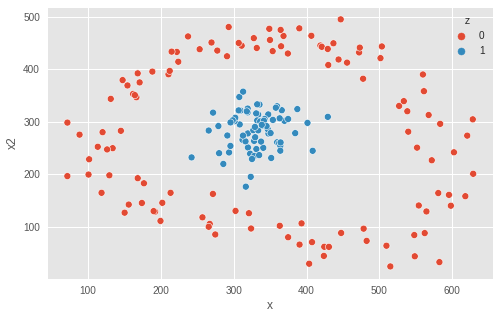

In [8]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot('x','x2',hue='z',data=df);

In [10]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6052631578947368

In [22]:
model_svc = SVC(random_state=42)
model_svc.fit(x_train,y_train)


y_pred = model_svc.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

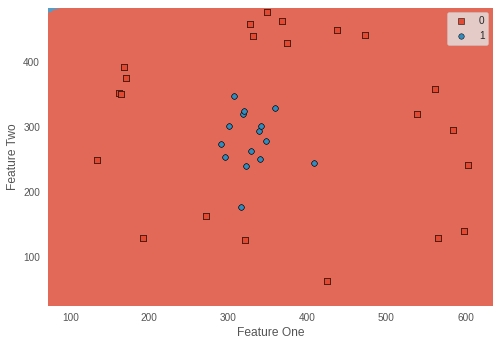

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [23]:
viz = DecisionViz(LogisticRegression())
viz.fit(x_train.values, y_train.values)
viz.draw(x_test.values, y_test.values)
viz.show()

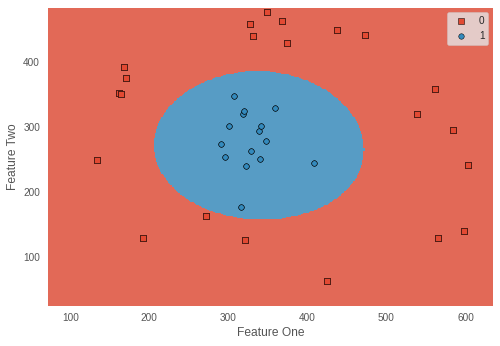

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [24]:
viz = DecisionViz(SVC(random_state=42))
viz.fit(x_train.values, y_train.values)
viz.draw(x_test.values, y_test.values)
viz.show()

# Separação e Margens

Demonstrando as margens de separação de uma SVC.

## Dados

In [32]:
## gerando os dados
x, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=42)
## separando o dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                   test_size=0.2, stratify=y,
                                   random_state=42)

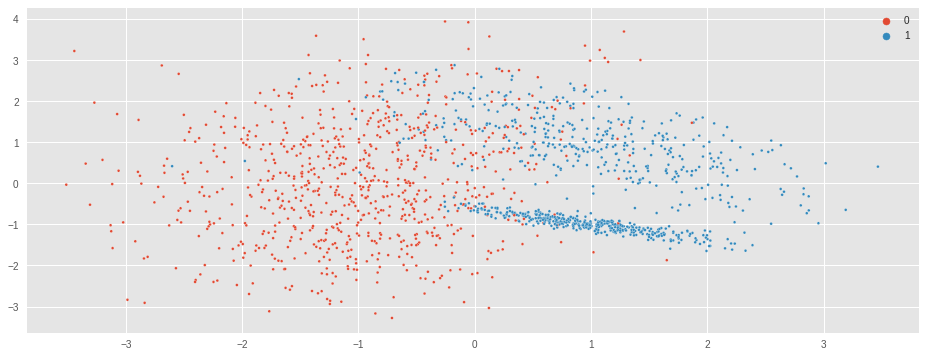

In [33]:
f, ax = plt.subplots(figsize=(16,6))

sns.scatterplot(x=x_train[:, 0], 
                y=x_train[:, 1], 
                hue=y_train, 
                s=8);

In [71]:
model = SVC(random_state=42)

In [72]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [73]:
params_grid = {'kernel':['rbf','linear','sigmoid'],'max_iter':[100,200,300],'C':[0.2,0.4,0.9,0.95,0.87,1]}

In [86]:
grid = GridSearchCV(model,params_grid,cv=10,scoring='f1',return_train_score=True)

In [87]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.2, 0.4, 0.9, 0.95, 0.87, 1],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'max_iter': [100, 200, 300]},
             return_train_score=True, scoring='f1')

In [88]:
grid.best_params_

{'C': 1, 'kernel': 'rbf', 'max_iter': 300}

In [89]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()['mean_train_score']

47    0.914078
20    0.913583
29    0.913768
38    0.913509
28    0.911614
Name: mean_train_score, dtype: float64

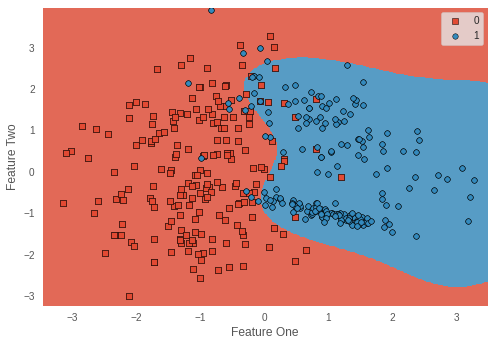

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [83]:
viz = DecisionViz(SVC(kernel='rbf',max_iter=300,random_state=42,C=0.9))
viz.fit(x_train, y_train)
viz.draw(x_test, y_test)
viz.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier

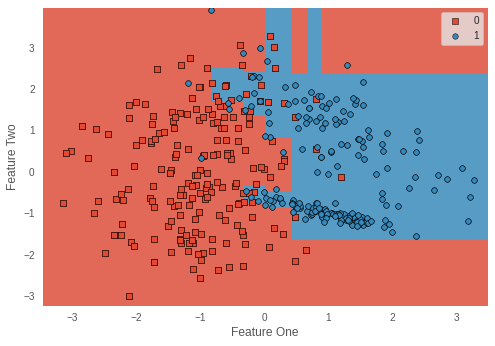

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [59]:
viz = DecisionViz(DecisionTreeClassifier(max_depth=5,random_state=42))
viz.fit(x_train, y_train)
viz.draw(x_test, y_test)
viz.show()

In [54]:
## treinando uma svc com kernel linear

svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=32)

A equação que descreve o limite de separação entre as classes é o seguinte

![](https://miro.medium.com/max/1400/1*i0IVm-YFUdbk6lVuyoXqCw.png)

Para encontrar a linha

![](https://miro.medium.com/max/1400/1*OrKFPKs6wDi3zIJININ3Fg.png)

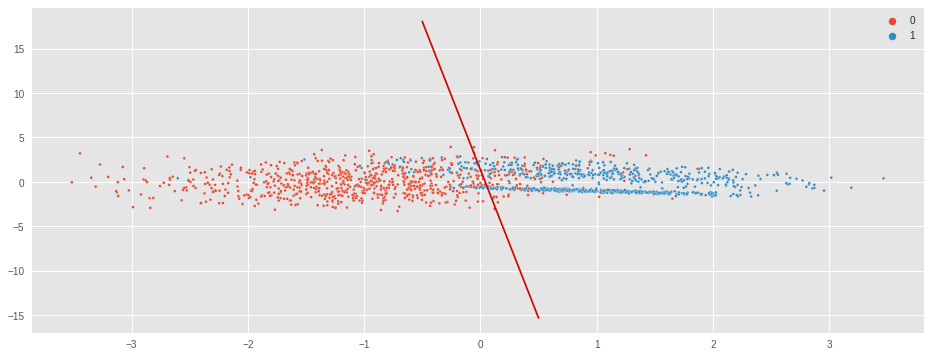

In [31]:
f, ax = plt.subplots(figsize=(16,6))

sns.scatterplot(x=x_train[:, 0], 
                y=x_train[:, 1], 
                hue=y_train, 
                s=8);

## encontrando e construindo o hiperplano

w = svc_model.coef_[0]           
b = svc_model.intercept_[0]

x_points = np.linspace(-0.5, 0.5)    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  


plt.plot(x_points, y_points, c='r');

Para encontrar as margens de uma SVM

![](https://miro.medium.com/max/1400/1*bQz9W852S0Sh_rzpqWyIXg.png)

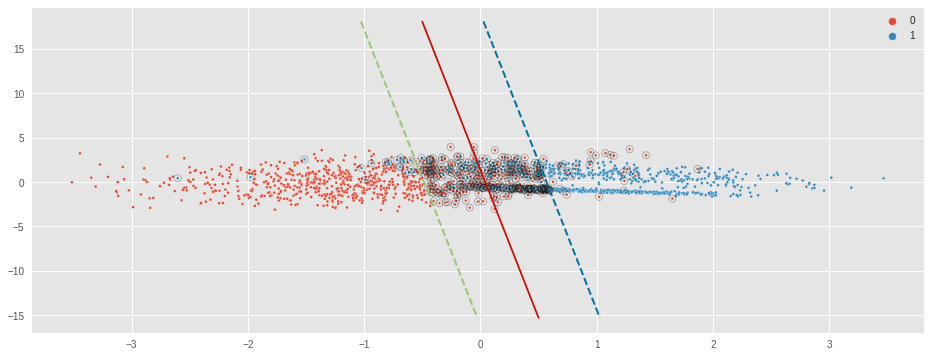

In [16]:
f, ax = plt.subplots(figsize=(16,6))

sns.scatterplot(x=x_train[:, 0], 
                y=x_train[:, 1], 
                hue=y_train, 
                s=8);

## encontrando e construindo o hiperplano

w = svc_model.coef_[0]           
b = svc_model.intercept_[0]

x_points = np.linspace(-0.5, 0.5)    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  


plt.plot(x_points, y_points, c='r');

## plotando os vetores de suporte
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

## plotando as margens
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)